{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

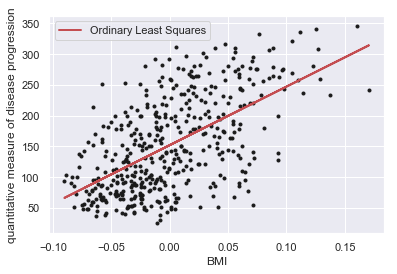

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = datasets.load_diabetes()
print(data)
X = data['data'][:,np.newaxis,2]
y = data['target']

lr = LinearRegression().fit(X,y)
y_pred=lr.predict(X)

sns.set(style='darkgrid')
plt.plot(X,y,'.k')
plt.xlabel('BMI')
plt.ylabel('quantitative measure of disease progression')
plt.plot(X,y_pred,'-r',linewidth=2,label='Ordinary Least Squares')
plt.legend()
plt.show()

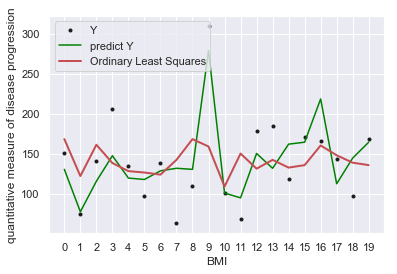

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

data = datasets.load_diabetes() #读取数据
X = data['data'][:20,np.newaxis,2] #挑选一个特征：
y = data['target'][:20]
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

lr = LinearRegression().fit(X,y)
lr_poly = LinearRegression().fit(X_poly,y)

y_pred = lr.predict(X)
y_pred_poly = lr_poly.predict(X_poly)

sns.set(style='darkgrid')

plt.plot(y,'.k',label='Y')
plt.plot(y_pred_poly,color="green",label='predict Y')
plt.plot(y_pred,'-r',linewidth=2,label='Ordinary Least Squares')
plt.xticks(range(0,len(X)))

plt.xlabel('BMI')
plt.ylabel('quantitative measure of disease progression')


plt.legend(loc="upper left")
plt.show()

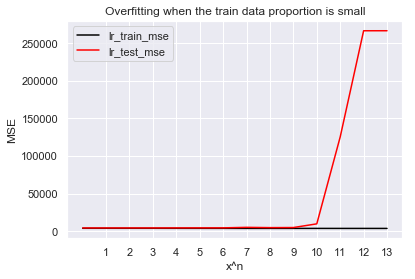

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

data = load_diabetes()

lr = []

train_mse = []
test_mse = []

X = data['data'][:,np.newaxis,2] #挑选一个特征：
y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

for i in range(1,15):
    poly_features = PolynomialFeatures(degree=i, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.fit_transform(X_test)
    lr = LinearRegression().fit(X_poly_train,Y_train)
    
    y_pred_train = lr.predict(X_poly_train)
    y_pred_test = lr.predict(X_poly_test)
    
    train_mse.append(mean_squared_error(Y_train,y_pred_train))
    test_mse.append(mean_squared_error(Y_test,y_pred_test))

#plt.rcParams['figure.figsize'] = (8.0,5.0)
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300
sns.set(style='darkgrid')
plt.xlabel('x^n')
plt.ylabel('MSE')
plt.xticks(range(1,15))

plt.plot(train_mse,linestyle="solid",color="black",label="lr_train_mse")
plt.plot(test_mse,linestyle="solid",color="red",label="lr_test_mse")

plt.title("Overfitting when the train data proportion is small")
plt.legend(loc="upper left")
plt.show()